# Comparing genes

In [87]:
library(enrichR)
library(gridExtra)
library(ComplexHeatmap)
library(viridis)
library(scrabbitr)
source("../data-in/rabbit/load_rabbit.R")

set.seed(44)

Loading required package: grid

ComplexHeatmap version 2.6.2
Bioconductor page: http://bioconductor.org/packages/ComplexHeatmap/
Github page: https://github.com/jokergoo/ComplexHeatmap
Documentation: http://jokergoo.github.io/ComplexHeatmap-reference

If you use it in published research, please cite:
Gu, Z. Complex heatmaps reveal patterns and correlations in multidimensional 
  genomic data. Bioinformatics 2016.

This message can be suppressed by:
  suppressPackageStartupMessages(library(ComplexHeatmap))




## Load data

In [2]:
r_data <- scrabbitr::loadRabbitData("../data-in/rabbit/")
r_data

class: SingleCellExperiment 
dim: 30725 146133 
metadata(0):
assays(2): counts logcounts
rownames(30725): ENSOCUG00000014251 ENSOCUG00000005054 ...
  ENSG00000175602 ENSG00000172324
rowData names(1): V1
colnames(146133): cell_1 cell_2 ... cell_172994 cell_172995
colData names(14): cell barcode ... sizeFactor celltype
reducedDimNames(3): UMAP TSNE PCA
altExpNames(0):

In [88]:
r_genes <- read.table("../data-in/rabbit/genes.tsv",sep="\t")
rowData(r_data) <- r_genes
rownames(r_data) <- r_genes$gene_name

In [4]:
m_genes <- read.table("../data-in/mouse/genes.tsv",sep="\t")
rownames(m_genes) <- m_genes$gene_name
head(m_genes)

,ensembl_id,gene_name
,<chr>,<chr>
Cnnm3,ENSMUSG00000001138,Cnnm3
Lman2l,ENSMUSG00000001143,Lman2l
Ddx18,ENSMUSG00000001674,Ddx18
Rgs20,ENSMUSG00000002459,Rgs20
Nab1,ENSMUSG00000002881,Nab1
Tbc1d8,ENSMUSG00000003134,Tbc1d8


In [5]:
m_data <- readRDS("../data-in/mouse/integrated_sce.rds")
m_data

class: SingleCellExperiment 
dim: 23972 430339 
metadata(0):
assays(2): counts logcounts
rownames(23972): ENSMUSG00000001138 ENSMUSG00000001143 ...
  ENSMUSG00000108929 ENSMUSG00000109022
rowData names(0):
colnames(430339): cell_1 cell_2 ... ext_cell_351871 ext_cell_351872
colData names(0):
reducedDimNames(0):
altExpNames(0):

In [77]:
m_meta <- read.table("../data-in/mouse/meta.tsv",sep="\t")
m_data$celltype <- m_meta$celltype.clustering

In [6]:
rm_one2one <- read.table("../data-in/orthologs/mmusculus.tsv",sep="\t")

In [67]:
ctype_shared = c('Allantois',
 'Allantois endothelium',
 'Anterior cardiopharyngeal progenitors',
 'Anterior somitic tissues',
 'Cardiomyocytes FHF 1',
 'Cardiomyocytes FHF 2',
 'Cardiopharyngeal progenitors',
 'Caudal mesoderm',
 'Cranial mesoderm',
 'Dermomyotome',
 'EMP',
 'EPDC',
 'Embryo proper endothelium',
 'Endocardium',
 'Epiblast',
 'Epicardium',
 'Erythroid',
 'Gut tube',
 'Lateral plate mesoderm',
 'Limb mesoderm',
 'MEP',
 'Megakariocytes',
 'Mesenchyme',
 'Mesothelium',
 'Midgut',
 'Migratory neural crest',
 'NMPs',
 'NMPs/Mesoderm-biased',
 'Nephron progenitors',
 'Neural tube',
 'Node',
 'Non-neural ectoderm 1',
 'Non-neural ectoderm 2',
 'Non-neural ectoderm 3',
 'Non-neural ectoderm 4',
 'Notochord',
 'Otic placode',
 'PGC',
 'Parietal endoderm',
 'Pharyngeal endoderm',
 'Posterior somitic tissues',
 'Presomitic mesoderm',
 'Primitive Streak',
 'Sclerotome',
 'Somitic mesoderm',
 'Thyroid primordium',
 'Venous endothelium',
 'Visceral endoderm',
 'YS endothelium')

## Compute marker genes

In [78]:
# Downsample so similar number of each cell type
r_ds <- vector()
m_ds <- vector()

for (celltype in ctype_shared) {
    r_cells <- colnames(r_data[,r_data$celltype==celltype])
    r_ncells <- length(r_cells)
    
    m_cells <-  colnames(m_data[,m_data$celltype==celltype])
    m_ncells <- length(m_cells)
    
    m_sample <- sample(m_cells,min(r_ncells,m_ncells))
    m_ds <- c(m_ds, m_sample)
        
    r_sample <- sample(r_cells,min(r_ncells,m_ncells))
    r_ds <- c(r_ds, r_sample)
}


In [80]:
r_sub <- r_data[,r_ds]
m_sub <- m_data[,m_ds]

### Get rabbit cell type markers

In [92]:
# Get rabbit cell type markers
#rownames(r_sub) <- r_genes$gene_name #temp
r_markers.up <- scran::findMarkers(r_sub, groups=r_sub$celltype, pval.type="all",direction="up")
head(r_markers.up$`PGC`[,1:4],10)

DataFrame with 10 rows and 4 columns
                       p.value         FDR summary.logFC logFC.Allantois
                     <numeric>   <numeric>     <numeric>       <numeric>
KIT                2.73551e-33 8.40485e-29      1.405583         1.88078
NANOS3             1.16713e-29 1.79301e-25      1.849997         1.92897
ENSOCUG00000029659 2.37526e-24 1.90954e-20      1.269247         1.28029
ENSOCUG00000013268 2.48598e-24 1.90954e-20      1.450328         1.48496
DDIT4L             3.05518e-19 1.87741e-15      1.288919         1.97346
ENSOCUG00000001387 3.40364e-18 1.74295e-14      1.165575         1.79264
TFAP2C             5.24742e-18 2.22921e-14      0.988153         1.24951
PCSK1N             5.80428e-18 2.22921e-14      1.051483         1.22857
SOX15              3.39091e-16 1.15762e-12      0.895921         1.06532
ENSOCUG00000027435 1.86611e-15 5.73362e-12      0.609258         1.10164

In [93]:
# Export rabbit markers
saveRDS(r_markers.up,"../data-out/compare_genes/r_markers_up_all.rds")

### Get mouse cell type markers

In [97]:
#rownames(m_sub) <- m_genes$gene_name #temp
m_markers.up <- scran::findMarkers(m_sub, groups=m_sub$celltype, pval.type="all",direction="up")
head(m_markers$`PGC`[,1:4],10)

DataFrame with 10 rows and 4 columns
             p.value       FDR summary.logFC logFC.Allantois
           <numeric> <numeric>     <numeric>       <numeric>
Dppa3    1.19321e-06 0.0286037     0.7386684       0.8163783
Dnd1     5.37817e-05 0.6446272     0.3928108       0.5166137
Gm9      4.34323e-04 1.0000000     0.1710066       0.1962453
Wnt6     9.27131e-04 1.0000000     0.4341943       1.0792592
Ascl2    1.07170e-03 1.0000000     0.2670780       0.3666121
Fthl17a  1.30708e-03 1.0000000     0.2297077       0.2482819
Ifitm3   1.31113e-03 1.0000000     0.6522985       1.7409709
Sfn      1.82920e-03 1.0000000     0.3049651       0.6408384
Serpinh1 3.52185e-03 1.0000000    -0.3763282      -1.6243812
Prdm14   6.81381e-03 1.0000000     0.0839289       0.0903017

In [100]:
# Export mouse markers
saveRDS(m_markers.up,"../data-out/compare_genes/m_markers_up_all.rds")

## Compare marker genes

Uploading data to Enrichr... Done.
  Querying GO_Molecular_Function_2021... Done.
  Querying GO_Biological_Process_2021... Done.
  Querying KEGG_2021_Human... Done.
Parsing results... Done.


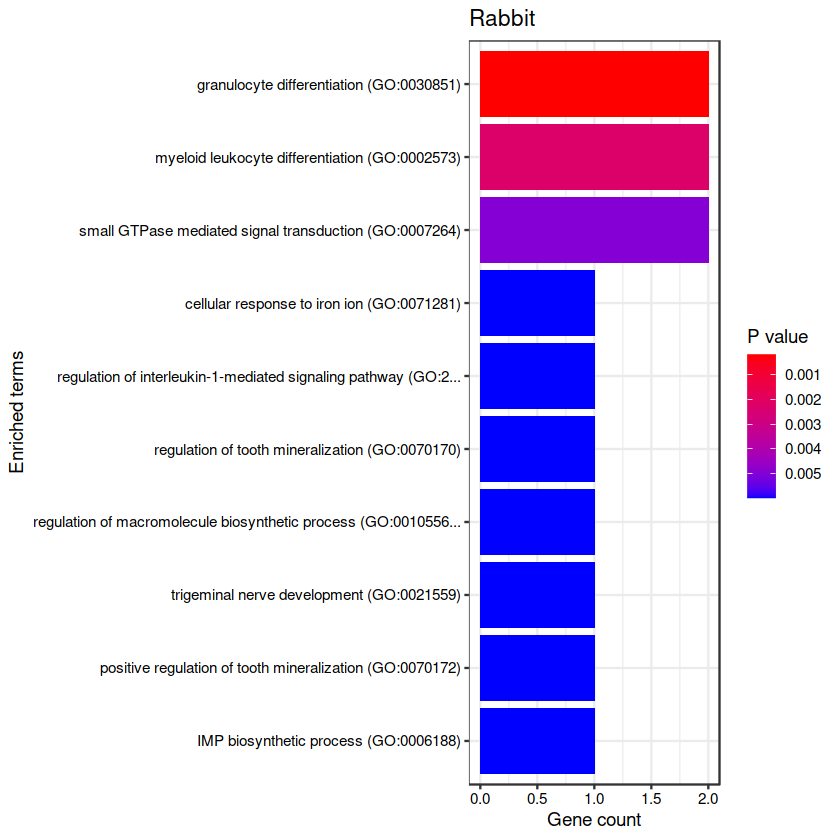

In [33]:
gene_lists = c("GO_Molecular_Function_2021","GO_Biological_Process_2021","KEGG_2021_Human")

enriched <- enrichr(rownames(r_markers$`Syncytiotrophoblast`)[1:20], gene_lists)
plotEnrich(enriched[[2]], showTerms = 10, numChar = 60, y = "Count", 
                     orderBy = "P.value",title="Rabbit")

In [7]:
# Load precomputed markers
r_markers <- readRDS("../data-out/compare_genes/r_markers_up_all.rds")
m_markers <- readRDS("../data-out/compare_genes/m_markers_up_all.rds")

In [101]:
r_markers <- r_markers.up
m_markers <- m_markers.up

In [230]:
rm_markers <- lapply(ctype_shared,function(celltype){
  rct_markers <- r_markers[[celltype]][,c("p.value","FDR","summary.logFC")]
  mct_markers <- m_markers[[celltype]][,c("p.value","FDR","summary.logFC")]
  
  # Add gene name/ensembl id info
  rct_markers$rgene <- rownames(rct_markers)
  mct_markers$mgene <- rownames(mct_markers)
  
  rct_markers$rensembl <- r_genes[rownames(rct_markers),"ensembl_id"]
  mct_markers$mensembl <- m_genes[rownames(mct_markers),"ensembl_id"]
  
  # Subset one-to-one orthologs
  rct_markers <- rct_markers[rct_markers$rensembl %in% rm_one2one$ref,]
  mct_markers <- mct_markers[mct_markers$mensembl %in% rm_one2one$query,]
  
  rownames(rct_markers) <- rm_one2one[rct_markers$rensembl,"query"]
  rownames(mct_markers) <- mct_markers$mensembl
  
  # Merge together markers
  markers <- merge(rct_markers,mct_markers,by=0,all=F)
  
  # Remove non-significant degs
  markers <- markers[markers$p.value.x < 0.05 | markers$p.value.y < 0.05,]
  
  markers <- markers[order(markers$FDR.x,-markers$summary.logFC.x,decreasing = F),]
  markers <- markers[,c("rgene","rensembl","mgene",
                        "mensembl","p.value.x","p.value.y","FDR.x","FDR.y",
                        "summary.logFC.x","summary.logFC.y")]
  
  # Assign unique or shared
  markers$class <- ""
  markers$class[(markers$p.value.x < 0.05) & (markers$p.value.y < 0.05) &
                  sign(markers$summary.logFC.x)==sign(markers$summary.logFC.y)] <- "shared"
  markers$class[(markers$p.value.x < 0.05) & (markers$p.value.y > 0.05)] <- "rabbit unique"
  markers$class[(markers$p.value.y < 0.05) & (markers$p.value.x > 0.05)] <- "mouse unique"
  markers$class <- as.factor(markers$class)
  
  return(markers)
  
}) 
names(rm_markers) <- ctype_shared


In [231]:
# TODO: Add to scrabbitr
getGeneMeansFast <- function(gene, mat, celltypes){
  expr <- mat[gene,]
  medians = aggregate(formula = expr ~ celltypes, FUN = mean)
  out = matrix(medians$expr, nrow = 1, dimnames = list(gene, medians$celltypes))
  return(out)
}

getExpressionFast <- function(sce,genes,group_by="celltype",norm="min-max") {
  genes <- genes[!is.na(genes)]
  mat <- logcounts(sce)[genes,]
  means <- lapply(genes, getGeneMeansFast, mat = mat, celltypes = sce[[group_by]])
  combined <- do.call(rbind,means)
  celltypes <- colnames(combined)
  if(norm=="min-max") {
    combined <- sweep(combined, 1, apply(combined, 1, max), "/")
  } else if(norm=="z-scale") {
    combined <- t(apply(combined, 1, scale))
    colnames(combined) <- celltypes
  } 
  return(combined)
}

In [232]:
# Plot shared/unique heatmap
getSharedUniqueMarkers <- function(merge.markers,N=1) {

  rchosen <- NULL
  mchosen <- NULL
  
  ncelltypes <- length(names(merge.markers))
  rshared <- mshared <- runiq <- muniq <- setNames(data.frame(matrix(ncol = ncelltypes,
                                                   nrow = 1)),names(merge.markers))
  for (celltype in names(merge.markers)) {
    markers <- merge.markers[[celltype]]
    
    # Make sure genes not already chosen
    markers <- markers[!(markers$rgene%in%rchosen) &
                         !(markers$mgene%in%mchosen),]
    
    markers <- markers[order(pmax(markers[,"FDR.x"],
                             markers[,"FDR.y"]),
                             decreasing=F),]
    
    rshared_markers <- markers[markers$class=="shared","rgene"][1:N]
    mshared_markers <- as.character(markers[markers$class=="shared","mgene"][1:N])
    
    markers <- markers[order(markers[,"FDR.x"],
                             decreasing=F),]
    runiq_markers <- markers[markers$class=="rabbit unique","rgene"][1:N]
    
    markers <- markers[order(markers[,"FDR.y"],
                             decreasing=F),]
    muniq_markers <- markers[markers$class=="mouse unique","mgene"][1:N]
    
    rshared[[celltype]] <- rshared_markers
    mshared[[celltype]] <- mshared_markers
    runiq[[celltype]] <- runiq_markers
    muniq[[celltype]] <- muniq_markers
    
    rchosen <- c(rchosen,rshared_markers,runiq_markers)
    mchosen <- c(mchosen,mshared_markers,muniq_markers)
  }
  
  return(list(rshared=rshared,mshared=mshared,runiq=runiq,muniq=muniq))
    
}

In [233]:
hm.genes <- getSharedUniqueMarkers(rm_markers)

In [234]:
r_hm.genes <- c(rbind(as.character(as.vector(hm.genes$rshared)), 
                       as.character(as.vector(hm.genes$runiq))))

m_hm.genes <- c(rbind(as.character(as.vector(hm.genes$mshared)), 
                       as.character(as.vector(hm.genes$muniq))))

In [235]:
r_hm.exp <- getExpressionFast(r_data, r_hm.genes, norm="min-max")

In [236]:
m_hm.exp <- getExpressionFast(m_data, m_hm.genes, norm="min-max")

Warning message:
“Heatmap/annotation names are duplicated: Mean expression”


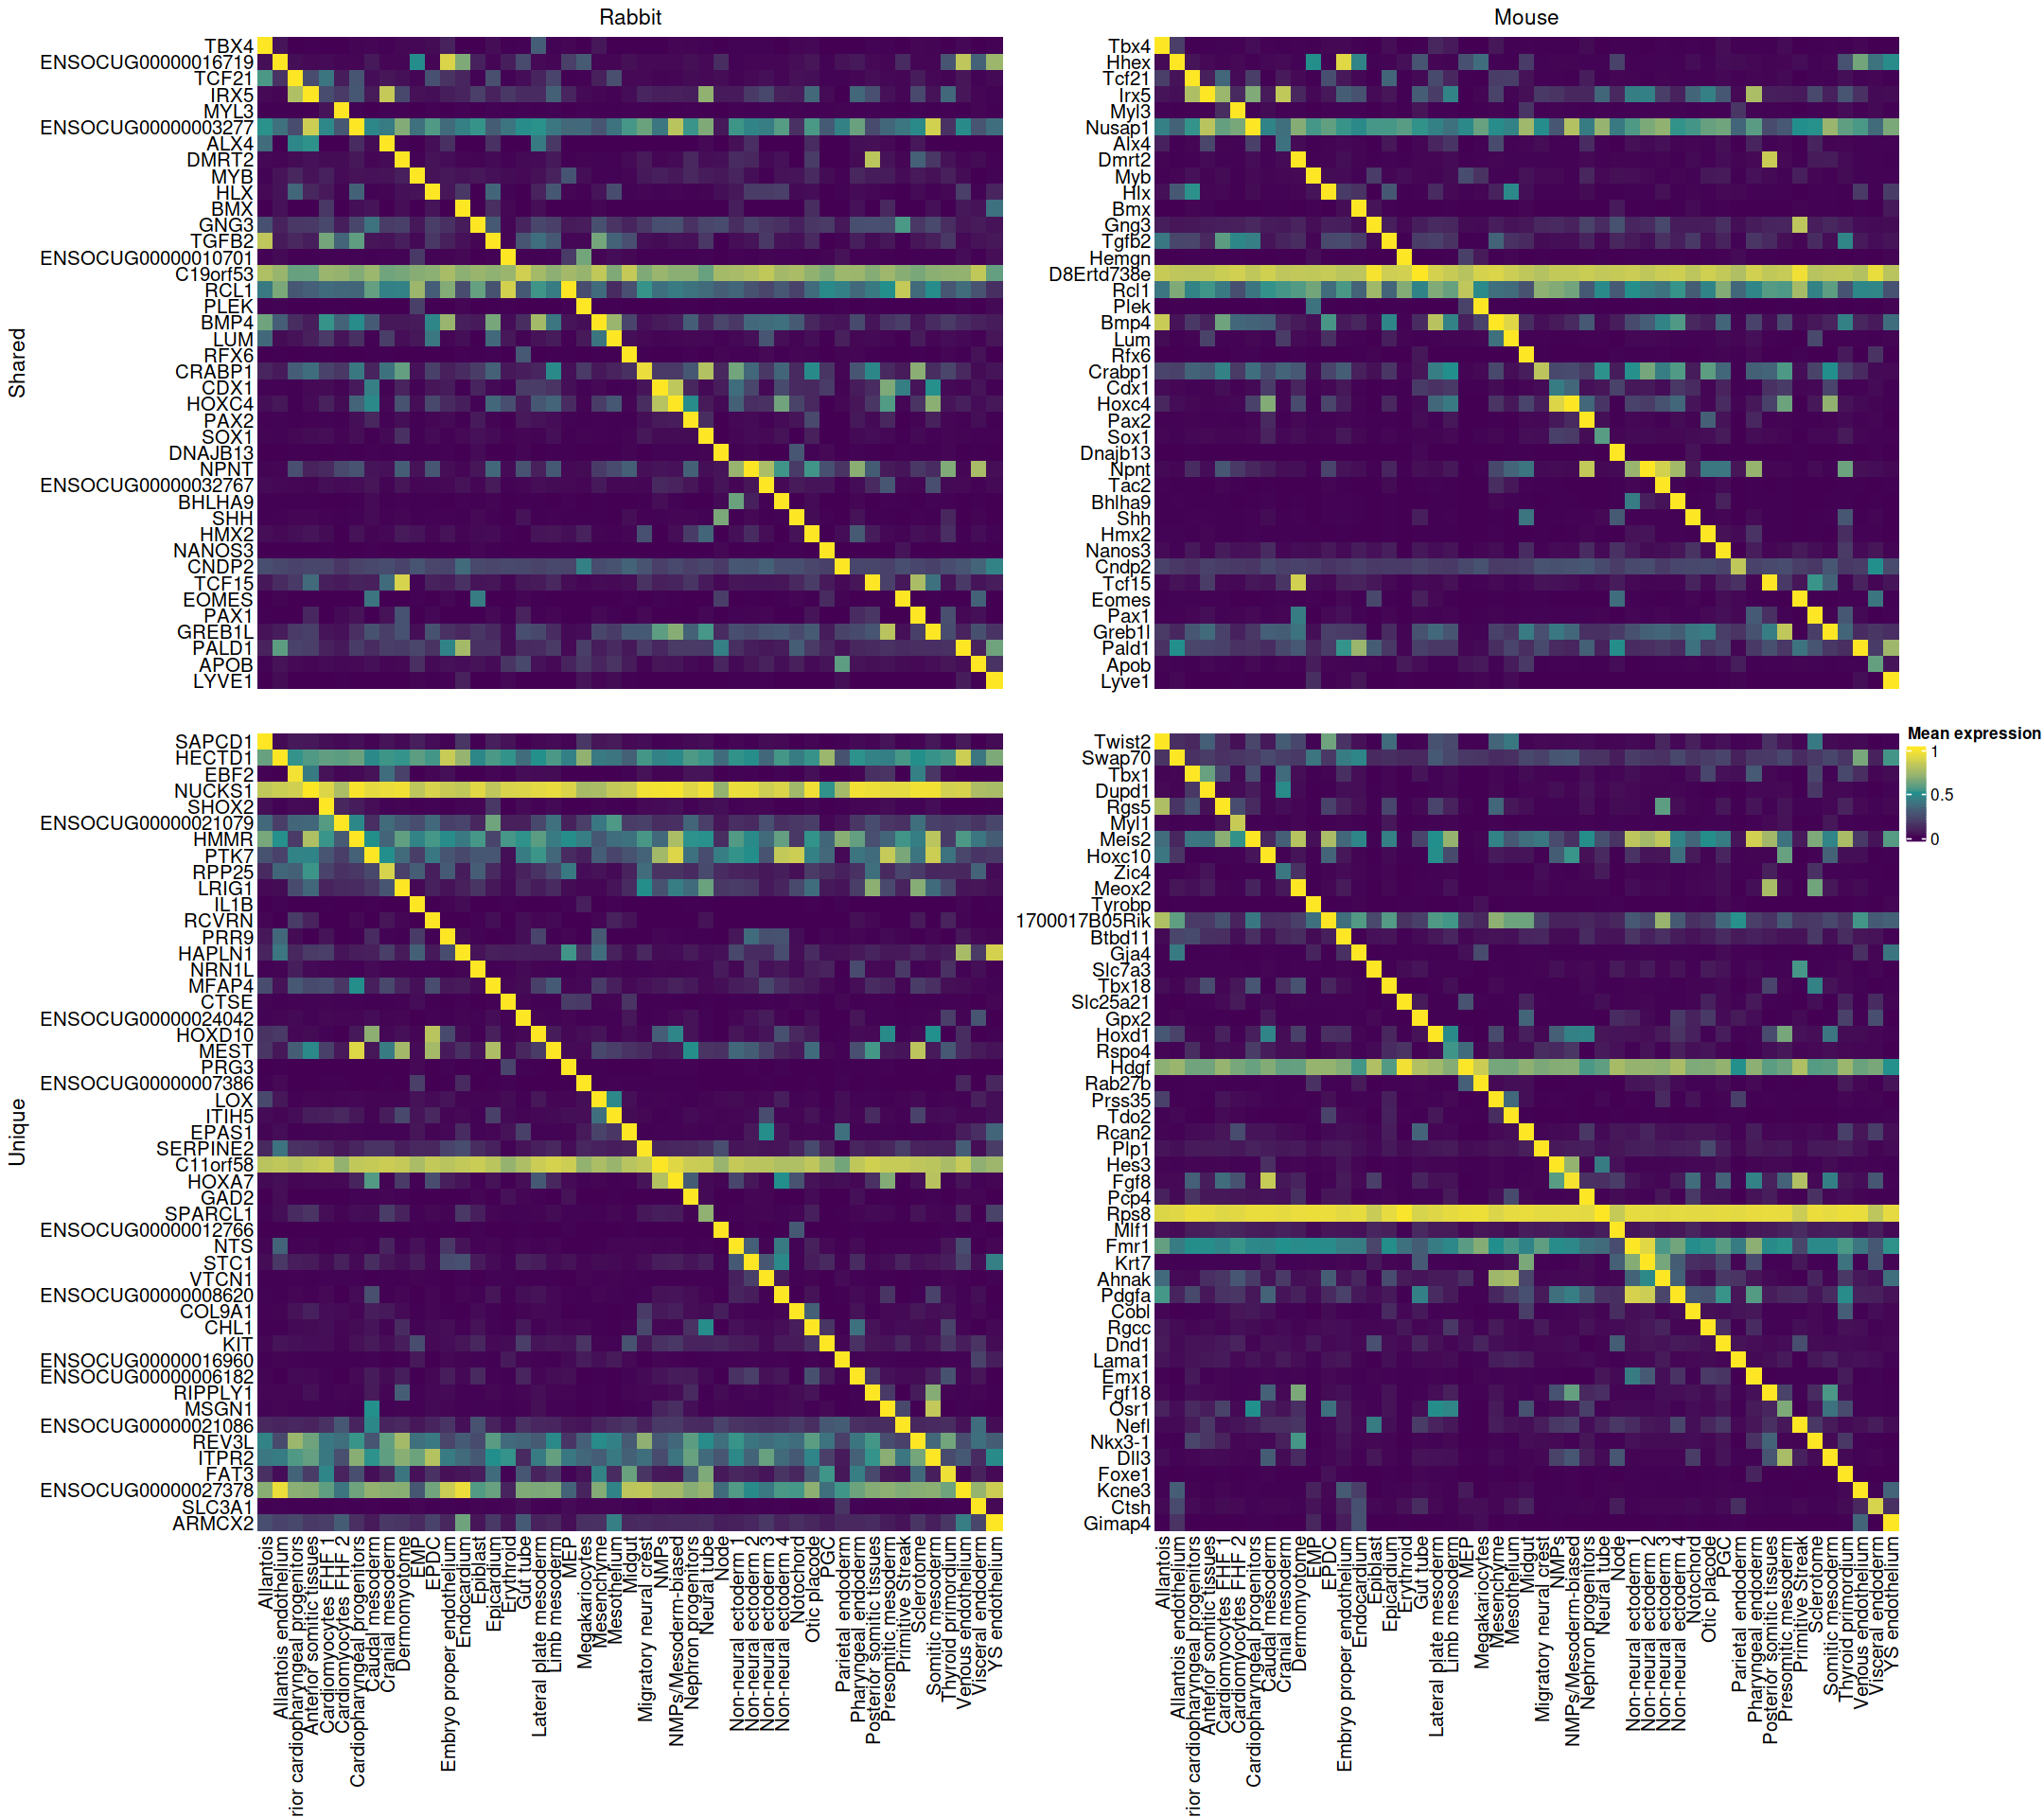

In [237]:
options(repr.plot.width=18, repr.plot.height=16)

p1 <- Heatmap(r_hm.exp[,ctype_shared],
        name = "Mean expression",
        cluster_rows = F,
        cluster_columns = F,
        cluster_row_slices = F,
        cluster_column_slices=F,
        column_title = "Rabbit",
        row_names_side = "left",
        row_split = ifelse(r_hm.genes[!is.na(r_hm.genes)] %in% hm.genes$rshared,"Shared", "Unique"),
        row_labels = rownames(r_hm.exp),
        row_gap = unit(10, "mm"),
        col=circlize::colorRamp2(c(0,0.5,1),
                                 viridis(3,option="D")))

p2 <- Heatmap(m_hm.exp[,ctype_shared],
        name = "Mean expression",
        cluster_rows = F,
        cluster_columns = F,
        cluster_row_slices = F,
        cluster_column_slices=F,
        column_title = "Mouse",
        row_names_side = "left",
        row_split = ifelse(m_hm.genes[!is.na(m_hm.genes)] %in% hm.genes$mshared,"Shared", "Unique"),
        row_labels = rownames(m_hm.exp),
        row_gap = unit(10, "mm"),
        col=circlize::colorRamp2(c(0,0.5,1),
                                 viridis(3,option="D")))


p <- p1 + p2
draw(p, auto_adjust = FALSE)

### Gene set enrichment

In [46]:
enrichr_dbs = c("GO_Molecular_Function_2021","GO_Biological_Process_2021","MSigDB_Hallmark_2020","Transcription_Factor_PPIs")


In [52]:
ct_marks <- rm_markers[["PGC"]]

mct_genes <- ct_marks[ct_marks$class=="mouse unique",]
mct_genes <- mct_genes[mct_genes$summary.logFC.y > 0,]
mct_genes <- mct_genes[order(mct_genes$FDR.y),"mgene"]
    
rct_genes <- ct_marks[ct_marks$class=="rabbit unique",]
rct_genes <- rct_genes[rct_genes$summary.logFC.x > 0,]
rct_genes <- rct_genes[order(rct_genes$FDR.x),"rgene"]
    
rmct_genes <- ct_marks[ct_marks$class=="shared",]
rmct_genes <- rmct_genes[(rmct_genes$summary.logFC.y > 0) & (rmct_genes$summary.logFC.x > 0),]
rmct_genes <- rmct_genes[order(rmct_genes$FDR.y,rmct_genes$FDR.x),"mgene"]

In [57]:
ct_marks[ct_marks$class=="mouse unique",]

DataFrame with 0 rows and 11 columns

In [50]:

getCelltypeEnriched <- function(rm_markers, celltype,
                                gene_list="GO_Biological_Process_2021") {
    
    ct_marks <- rm_markers[[celltype]]

    mct_genes <- ct_marks[ct_marks$class=="mouse unique",]
    mct_genes <- mct_genes[mct_genes$summary.logFC.y > 0,]
    mct_genes <- mct_genes[order(mct_genes$FDR.y),"mgene"]
    
    rct_genes <- ct_marks[ct_marks$class=="rabbit unique",]
    rct_genes <- rct_genes[rct_genes$summary.logFC.x > 0,]
    rct_genes <- rct_genes[order(rct_genes$FDR.x),"rgene"]
    
    rmct_genes <- ct_marks[ct_marks$class=="shared",]
    rmct_genes <- rmct_genes[(rmct_genes$summary.logFC.y > 0) & (rmct_genes$summary.logFC.x > 0),]
    rmct_genes <- rmct_genes[order(rmct_genes$FDR.y,rmct_genes$FDR.x),"mgene"]
    
    m_enriched <- enrichr(mct_genes, gene_list)
    r_enriched <- enrichr(rct_genes, gene_list)
    mr_enriched <- enrichr(rmct_genes, gene_list)
    
    return(list(m_enriched=m_enriched,r_enriched=r_enriched,
                shared_enriched=mr_enriched))
}
    

plotCelltypeEnriched <- function(rm_markers, celltype, gene_list) {            
    enriched <- getCelltypeEnriched(rm_markers, celltype,gene_list)
    p1 <- plotEnrich(enriched$r_enriched[[1]], showTerms = 10, numChar = 60, y = "Count", 
                     orderBy = "P.value",title="Rabbit")
    p2 <- plotEnrich(enriched$m_enriched[[1]], showTerms = 10, numChar = 60, y = "Count", 
                     orderBy = "P.value",title="Mouse")
    p3 <- plotEnrich(enriched$shared_enriched[[1]], showTerms = 10, numChar = 60, y = "Count", 
                     orderBy = "P.value",title="Shared")
    p <- grid.arrange(p1,p2,p3)
    return(p)

}

In [51]:
plotCelltypeEnriched(rm_markers,"PGC", enrichr_dbs)

No genes have been given



Uploading data to Enrichr... Done.
  Querying GO_Molecular_Function_2021... Done.
  Querying GO_Biological_Process_2021... Done.
  Querying MSigDB_Hallmark_2020... Done.
  Querying Transcription_Factor_PPIs... Done.
Parsing results... Done.


No genes have been given



ERROR: Error in plotEnrich(enriched$m_enriched[[1]], showTerms = 10, numChar = 60, : df is malformed - must be a data frame


In [65]:
enriched <- getCelltypeEnriched(rm_markers, "PGC",gene_list=enrichr_dbs)
head(enriched$r_enriched[[2]],10)

No genes have been given



Uploading data to Enrichr... Done.
  Querying GO_Molecular_Function_2021... Done.
  Querying GO_Biological_Process_2021... Done.
  Querying MSigDB_Hallmark_2020... Done.
  Querying Transcription_Factor_PPIs... Done.
Parsing results... Done.


No genes have been given



NULL

Uploading data to Enrichr... Done.
  Querying GO_Molecular_Function_2021... Done.
Parsing results... Done.


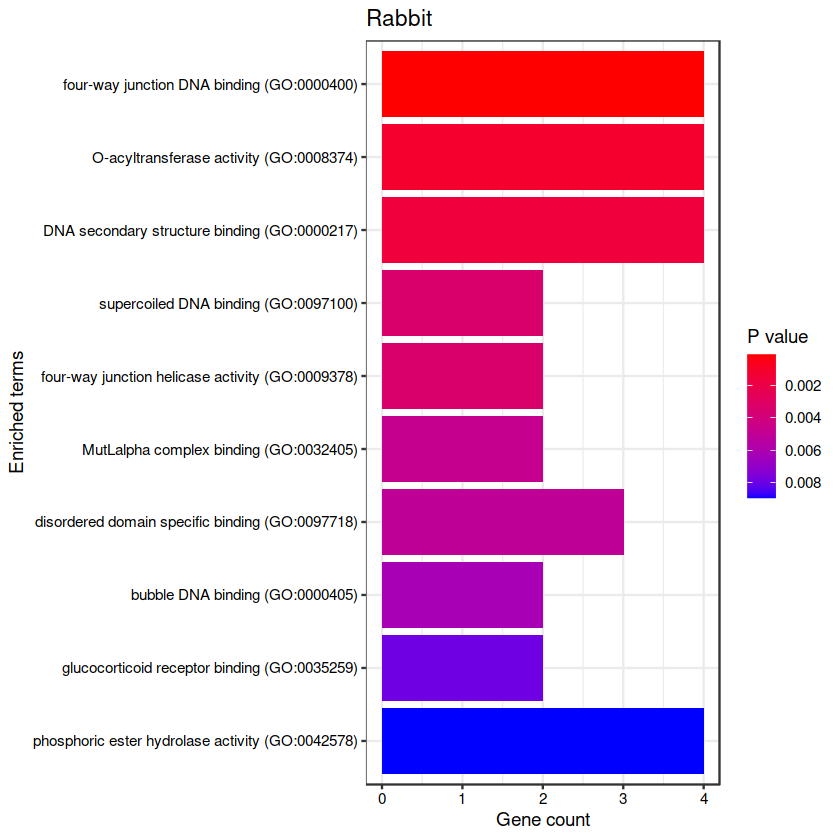

In [40]:
enriched = enrichr(rm_markers$PGC[rm_markers$PGC$class=="rabbit unique","rgene"],"GO_Molecular_Function_2021")
plotEnrich(enriched[[1]], showTerms = 10, numChar = 60, y = "Count", 
                     orderBy = "P.value",title="Rabbit")

In [ ]:
p1 <- scater::plotReducedDim(r_data, "UMAP", colour_by="CDX2") + scale_color_viridis(direction=-1)
p2 <- scater::plotReducedDim(m_data, "UMAP", colour_by="Cdx2") + scale_color_viridis(direction=-1)
grid.arrange(p1,p2,nrow=1)

## Integration 

In [47]:
# Load SAMAP clustering and species-specific clusters
r_clusts <- read.table("../data-out/integration/oc_samap_clusters_res10.tsv",sep="\t",row.names=1,header=TRUE)
species_clusts <- read.table("../data-out/integration/species_specific_clusters_res10.tsv",sep="\t",header=TRUE)[,2:3]
head(species_clusts)

,leiden_clusters,species
,<int>,<chr>
1,0,mo
2,2,mo
3,3,mo
4,5,mo
5,11,mo
6,18,ra


In [54]:
r_data$samap_clusts <- r_clusts$leiden_clusters
r_data$rabbit_specific <- r_data$samap_clusts %in% species_clusts[species_clusts$species=="ra","leiden_clusters"]

In [52]:
head(r_data$samap_clusts)

,leiden_clusters
,<int>
cell_1,96
cell_2,72
cell_4,96
cell_5,74
cell_6,9
cell_9,72


In [53]:
head(species_clusts[species_clusts$species=="ra","leiden_clusters"])

[1] 18 25 51 61 62 72

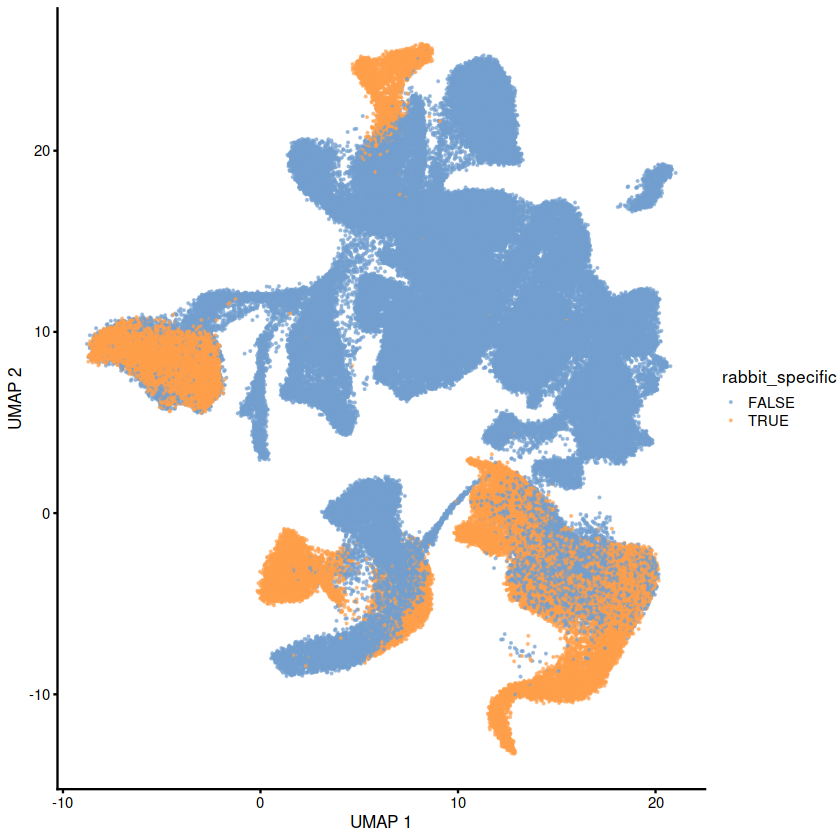

In [56]:
plotReducedDim(r_data, "UMAP", colour_by="rabbit_specific",point_size=0.1)

In [61]:
# Unique blood cluster
r_blood <- r_data[,r_data$celltype=="Erythroid"]
markers <- scran::findMarkers(r_blood,groups=r_blood$rabbit_specific, pval.type="all",direction="up")
markers[["TRUE"]][1:10,1:3]

DataFrame with 10 rows and 3 columns
                     p.value       FDR summary.logFC
                   <numeric> <numeric>     <numeric>
RPL17-C18orf32             0         0      1.878579
ENSOCUG00000010546         0         0      0.720907
ENSOCUG00000022961         0         0      1.516459
ENSOCUG00000008507         0         0      0.718256
ZNF34                      0         0      0.678669
ENSOCUG00000016657         0         0      1.733246
ENSOCUG00000013915         0         0      0.639232
ENSOCUG00000029357         0         0      0.816028
ENSOCUG00000002150         0         0      0.663263
ENSOCUG00000002862         0         0      0.687519

In [66]:
rownames(markers[["TRUE"]])[1:100]

[1] "RPL17-C18orf32"     "ENSOCUG00000010546" "ENSOCUG00000022961"
  [4] "ENSOCUG00000008507" "ZNF34"              "ENSOCUG00000016657"
  [7] "ENSOCUG00000013915" "ENSOCUG00000029357" "ENSOCUG00000002150"
 [10] "ENSOCUG00000002862" "ENSOCUG00000001606" "ENSOCUG00000007536"
 [13] "ENSOCUG00000003613" "ENSOCUG00000010363" "ELOA"              
 [16] "ENSOCUG00000011509" "ENSOCUG00000009091" "ENSOCUG00000024833"
 [19] "ENSOCUG00000007825" "ENSOCUG00000005749" "ENSOCUG00000012476"
 [22] "ENSOCUG00000003068" "ENSOCUG00000003802" "ENSOCUG00000005442"
 [25] "ENSOCUG00000022412" "PFDN5"              "ENSOCUG00000006370"
 [28] "ENSOCUG00000026627" "ENSOCUG00000017386" "RPL12"             
 [31] "ENSOCUG00000028015" "ENSOCUG00000012472" "RPS5"              
 [34] "ENSOCUG00000002506" "RPS3A"              "ENSOCUG00000008407"
 [37] "ENSOCUG00000023680" "ENSOCUG00000027712" "ENSOCUG00000026336"
 [40] "RPS25"              "ENSOCUG00000002996" "RPLP1"             
 [43] "ENSOCUG00000035553" "ENSOCUG00000002074" "ENSOCUG00000000179"
 [46] "RPL28"              "ENSOCUG00000010089" "ENSOCUG00000005536"
 [49] "GLNB2"              "ENSOCUG00000002791" "ENSOCUG00000010552"
 [52] "ENSOCUG00000015749" "ENSOCUG00000005938" "RPL10"             
 [55] "ENSOCUG00000004065" "RPL13A"             "ENSOCUG00000027435"
 [58] "ENSOCUG00000009848" "RPL14"              "ENSOCUG00000022355"
 [61] "ENSOCUG00000021439" "ENSOCUG00000037702" "ENSOCUG00000021220"
 [64] "RPL26"              "BTF3"               "RPL37"             
 [67] "AHSP"               "ENSOCUG00000033056" "UROD"              
 [70] "ENSOCUG00000022930" "ENSOCUG00000028092" "PHGDH"             
 [73] "ENSOCUG00000025050" "ENSOCUG00000028136" "ENSOCUG00000000851"
 [76] "ENSOCUG00000010855" "RPL24"              "ENSOCUG00000009140"
 [79] "RPS21"              "ENSOCUG00000004394" "ENSOCUG00000027423"
 [82] "ENSOCUG00000022250" "ENSOCUG00000011373" "ENSOCUG00000014878"
 [85] "B2M"                "ENSOCUG00000004424" "ENSOCUG00000023692"
 [88] "HBZ"                "ENSOCUG00000027459" "ENSOCUG00000021109"
 [91] "RFESD"              "RPL32"              "ENSOCUG00000032278"
 [94] "LDHB"               "IDH2"               "EIF4EBP1"          
 [97] "ENSOCUG00000012850" "ENSOCUG00000015741" "HMBS"              
[100] "ENSOCUG00000000604"

In [67]:
rownames(markers[["FALSE"]])[1:100]

[1] "ND4L"               "ENSOCUG00000023661" "ND3"               
  [4] "ATP8"               "CYTB"               "ND1"               
  [7] "ATP6"               "ENSOCUG00000029097" "ENSOCUG00000009529"
 [10] "ND5"                "ENSOCUG00000029117" "HSP90AA1"          
 [13] "COX1"               "ENSOCUG00000025724" "KLNB1"             
 [16] "ENSOCUG00000029116" "ND2"                "ENSOCUG00000025641"
 [19] "ENSOCUG00000027691" "EIF4G2"             "ENSOCUG00000021273"
 [22] "APOA1"              "HNRNPU"             "HSPD1"             
 [25] "ENSOCUG00000026023" "ENSOCUG00000006945" "CAPRIN1"           
 [28] "ENSOCUG00000006592" "MRPL17"             "PKHD1L1"           
 [31] "DDX3X"              "LRPPRC"             "NCL"               
 [34] "LGALS3"             "ENSOCUG00000017008" "ENSOCUG00000033220"
 [37] "PRRC2C"             "ENSOCUG00000009399" "DAB2"              
 [40] "ENSOCUG00000009672" "ENSOCUG00000010524" "APOC1"             
 [43] "ND4"                "APOB"               "EPB41"             
 [46] "COX2"               "CPS1"               "CLTC"              
 [49] "ENSOCUG00000026992" "ENSOCUG00000035124" "TFRC"              
 [52] "ENSOCUG00000037867" "GOLGA5"             "HSPA5"             
 [55] "COL11A1"            "TNKS2"              "FABP3"             
 [58] "ENSOCUG00000000552" "KIF11"              "HSPH1"             
 [61] "DARS1"              "EIF4G1"             "H1-1"              
 [64] "EIF3A"              "ENSOCUG00000001165" "APOA2"             
 [67] "CTSV"               "SLC16A1"            "GART"              
 [70] "ENSOCUG00000011619" "ENSOCUG00000034496" "HSPA4"             
 [73] "SLC7A8"             "SMARCA5"            "KPNB1"             
 [76] "ENSOCUG00000031811" "ENSOCUG00000013123" "SLC39A8"           
 [79] "ENSOCUG00000011117" "AQP2"               "ITM2A"             
 [82] "XPO1"               "HSPA9"              "BMP2K"             
 [85] "MYH10"              "ATP5F1A"            "ENSOCUG00000010162"
 [88] "HUWE1"              "RAD23B"             "SPTBN1"            
 [91] "ENSOCUG00000035555" "ENSOCUG00000029095" "OPA1"              
 [94] "ENSOCUG00000022143" "LBR"                "DCTN4"             
 [97] "ENSOCUG00000007393" "SCAF11"             "ADAM10"            
[100] "GATA3"

In [70]:
# Unique mesenchyme cluster
r_mesen <- r_data[,r_data$celltype=="Mesenchyme"]
markers <- scran::findMarkers(r_mesen,groups=r_mesen$rabbit_specific, pval.type="all",direction="up")
rownames(markers[["TRUE"]])[1:100]

[1] "ITGA4"              "GLNB2"              "HBZ"               
  [4] "ANXA1"              "ITM2B"              "LOX"               
  [7] "UCHL1"              "DLK1"               "COL3A1"            
 [10] "ICE2"               "ENSOCUG00000024081" "ATOX1"             
 [13] "COL1A1"             "COL1A2"             "GLIPR1"            
 [16] "COL4A2"             "SMOC1"              "EPAS1"             
 [19] "ENSOCUG00000024096" "ENSOCUG00000027082" "TIMP1"             
 [22] "ACTA2"              "WNT2"               "HAPLN1"            
 [25] "PDIA6"              "PTGS1"              "ENSOCUG00000022888"
 [28] "ITGB1"              "COL5A2"             "TNC"               
 [31] "PPIB"               "DKK3"               "CAVIN3"            
 [34] "ENSOCUG00000018814" "MYADM"              "FOXO4"             
 [37] "TMED3"              "FN1"                "ENSOCUG00000008071"
 [40] "VCAN"               "PCGF5"              "COL4A1"            
 [43] "ENSOCUG00000025148" "JUN"                "CTSV"              
 [46] "PLA2R1"             "PRDX4"              "HSPB1"             
 [49] "ENSOCUG00000005899" "BZW2"               "APP"               
 [52] "CAPN2"              "COX1"               "MXD4"              
 [55] "AFP"                "ARL4A"              "GPX7"              
 [58] "TXN"                "GSN"                "CCN4"              
 [61] "ENSOCUG00000029097" "COX3"               "VIM"               
 [64] "TNFRSF12A"          "LAMB1"              "APLP2"             
 [67] "PAM"                "CALD1"              "SSR2"              
 [70] "TWSG1"              "CDH11"              "TGFBI"             
 [73] "TEP1"               "GNG11"              "AEBP1"             
 [76] "ENSOCUG00000017932" "LAMA1"              "CCDC80"            
 [79] "TTR"                "ENSOCUG00000006102" "TMBIM6"            
 [82] "ENSOCUG00000008560" "RCSD1"              "ANXA5"             
 [85] "PON2"               "SPARC"              "RAMP2"             
 [88] "FUT8"               "ENSOCUG00000016686" "RGS5"              
 [91] "ENSOCUG00000003764" "ZNF711"             "GOLIM4"            
 [94] "IL6ST"              "CALM1"              "ENSOCUG00000022364"
 [97] "GNAS"               "ENSOCUG00000026992" "VLDLR"             
[100] "SLC25A24"

Uploading data to Enrichr... Done.
  Querying GO_Molecular_Function_2021... Done.
  Querying GO_Biological_Process_2021... Done.
  Querying KEGG_2021_Human... Done.
Parsing results... Done.


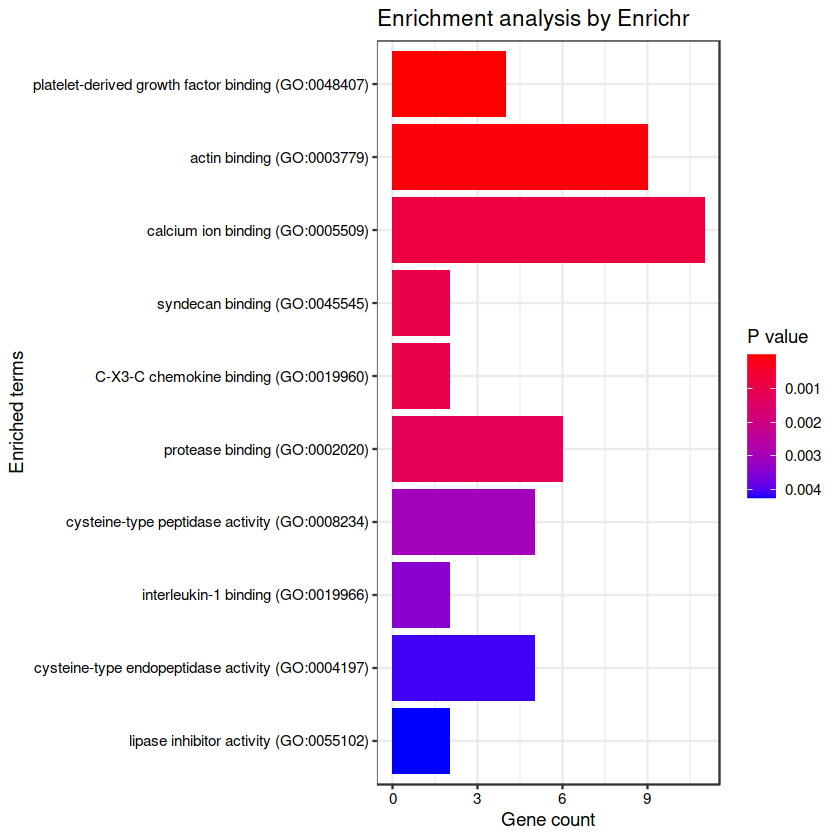

In [79]:
enriched <- enrichr(rownames(markers[["TRUE"]]), gene_lists)
plotEnrich(enriched[[1]], showTerms = 10, numChar = 60, y = "Count", 
                     orderBy = "P.value")

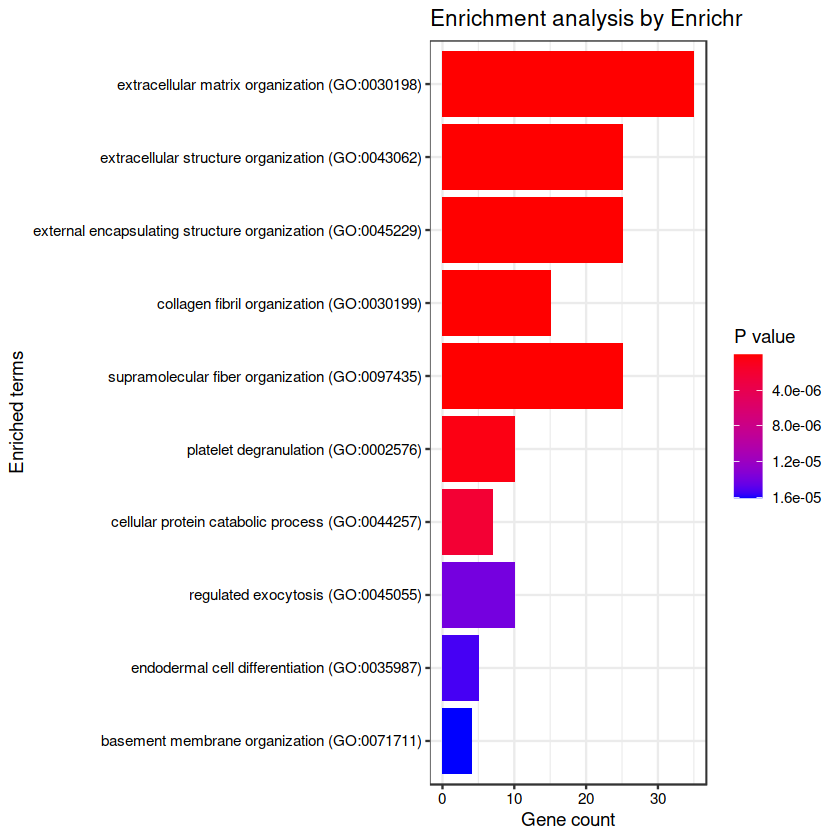

In [82]:
plotEnrich(enriched[[2]], showTerms = 10, numChar = 60, y = "Count", 
                     orderBy = "P.value")

In [ ]:
enriched <- enrichr(rownames(markers[["FALSE"]]), gene_lists)
plotEnrich(enriched[[1]], showTerms = 10, numChar = 60, y = "Count", 
                     orderBy = "P.value")